In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install plotly

In [ ]:
pip install numpy

In [ ]:
pip install scikit-image

In [ ]:
pip install scikit-learn

In [ ]:
pip install flask

In [ ]:
import numpy as np
import pandas as pd

import seaborn as b

import matplotlib.pyplot as plt

import plotly.offline as py

import plotly.graph_objs as go

import seaborn as sns

import nltk

from nltk.corpus import stopwords

from sklearn.metrics.pairwise import linear_kernel

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
zomato_data=pd.read_csv("zomato.csv",
                 engine="python",
                 error_bad_lines=False,
                 encoding='utf-8')
zomato_df=zomato_data
zomato_df.head(2)


<ipython-input-2-e39a0b99888a>:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



Skipping line 562: unexpected end of data


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [ ]:
zomato_df.shape

(560, 17)

In [ ]:
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
zomato_df.info

<bound method DataFrame.info of                                                    url  \
0    https://www.zomato.com/bangalore/jalsa-banasha...   
1    https://www.zomato.com/bangalore/spice-elephan...   
2    https://www.zomato.com/SanchurroBangalore?cont...   
3    https://www.zomato.com/bangalore/addhuri-udupi...   
4    https://www.zomato.com/bangalore/grand-village...   
..                                                 ...   
555  https://www.zomato.com/bangalore/sea-spice-by-...   
556  https://www.zomato.com/bangalore/mini-punjabi-...   
557  https://www.zomato.com/bangalore/onesta-banash...   
558  https://www.zomato.com/bangalore/wamama-banash...   
559  https://www.zomato.com/bangalore/jalsa-banasha...   

                                               address                   name  \
0    942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1    2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2    1112, Next to KIMS Medi

In [ ]:
zomato_df.isnull().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                            52
votes                            0
phone                            6
location                         0
rest_type                        0
dish_liked                     307
cuisines                         2
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [ ]:
zomato_df=zomato_df.drop(['url','phone','dish_liked'],axis=1)
zomato_df.dropna(how='any', inplace=True)
zomato_df.duplicated().sum()
zomato_df.drop_duplicates(inplace=True)
zomato_df=zomato_df.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})
zomato_df=zomato_df.loc[zomato_df.rate !='NEW']
zomato_df=zomato_df.loc[zomato_df.rate !='-'].reset_index(drop=True)
remove_slash=lambda x: x.replace('/5', '' ) if type(x)== np.str else x
zomato_df.rate=zomato_df.rate.apply(remove_slash).str.strip().astype('float')
zomato_df['cost'] = zomato_df['cost'].astype(str)
zomato_df['cost'] = zomato_df['cost'].apply(lambda x: x.replace(',','.'))
zomato_df['cost'] = zomato_df['cost'].astype(float)

<ipython-input-7-1f1560f2cc73>:8: DeprecationWarning:

`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
zomato_df.isnull().sum()

address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [ ]:
restaurants = list(zomato_df['name'].unique())

zomato_df['Mean Rating'] = 0

for i in range(len(restaurants)):

    zomato_df['Mean Rating'][zomato_df['name'] == restaurants[i]] = zomato_df['rate'][zomato_df['name'] == restaurants[i]].mean()

from sklearn.preprocessing import MinMaxScaler

scaler =MinMaxScaler(feature_range= (1,5))

zomato_df[['Mean Rating']] = scaler.fit_transform(zomato_df[[ 'Mean Rating']]).round(2)

<ipython-input-9-76d4b10debb8>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
zomato_df[['name','rate','location']].head()

,name,rate,location
0,Jalsa,4.1,Banashankari
1,Spice Elephant,4.1,Banashankari
2,San Churro Cafe,3.8,Banashankari
3,Addhuri Udupi Bhojana,3.7,Banashankari
4,Grand Village,3.8,Basavanagudi


In [ ]:
zomato_df["reviews_list"] = zomato_df["reviews_list"].str.lower()

#Removal of Puctuations

import string

PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):

    """custom function to remove the punctuation"""

    return text.translate(str.maketrans('','',PUNCT_TO_REMOVE))

zomato_df["reviews_list"] = zomato_df["reviews_list"].apply(lambda text: remove_punctuation(text))

In [ ]:
zomato_df[['reviews_list','cuisines']].sample(5)

,reviews_list,cuisines
175,rated 40 ratedn this place is very close to m...,"North Indian, Chinese, Continental"
377,rated 30 ratedn chicken burgers can be better...,"Fast Food, Burger"
244,rated 20 ratedn very slow in service and they...,"South Indian, North Indian, Chinese"
345,rated 20 ratedn this is small eatery opened r...,"Ice Cream, Beverages, Fast Food"
247,rated 50 ratedn located in jayanagar 7th bloc...,South Indian


Text(0, 0.5, 'Mumber of outlets')

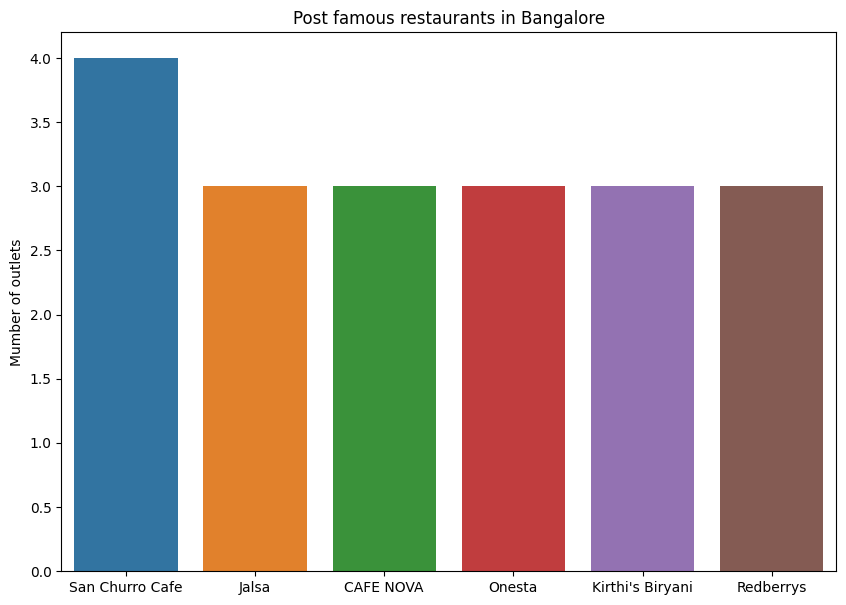

In [ ]:
plt.figure(figsize=(10,7))

chains=zomato_df["name"].value_counts()[:6]

sns.barplot(x=chains.index,y=chains,palette='tab10')

plt.title("Post famous restaurants in Bangalore")

plt.ylabel("Mumber of outlets")

<ipython-input-14-de0e7c897ef7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




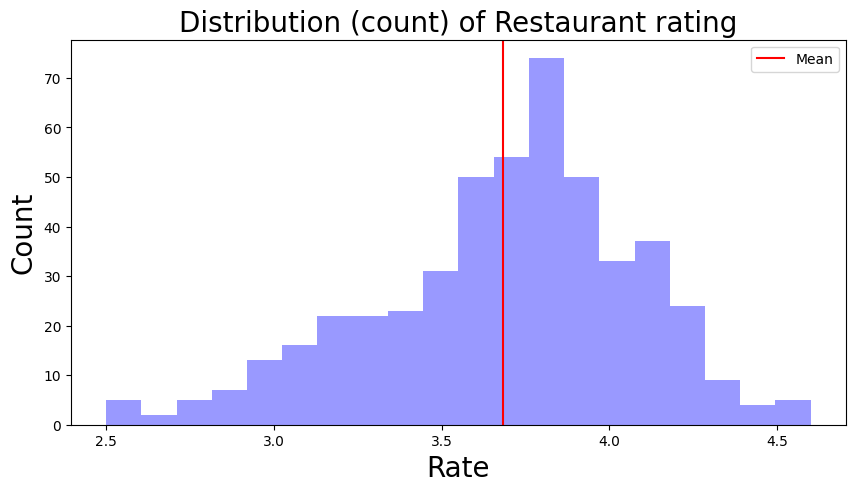

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.distplot(zomato_df.rate,kde=False,color= 'b',ax =ax,bins=20);
ax.axvline(zomato_df.rate.mean(), 0, 1, color='r', label='Mean')

ax.legend();

ax.set_ylabel('Count',size=20)

ax.set_xlabel('Rate',size=20)

ax.set_title('Distribution (count) of Restaurant rating',size=20);

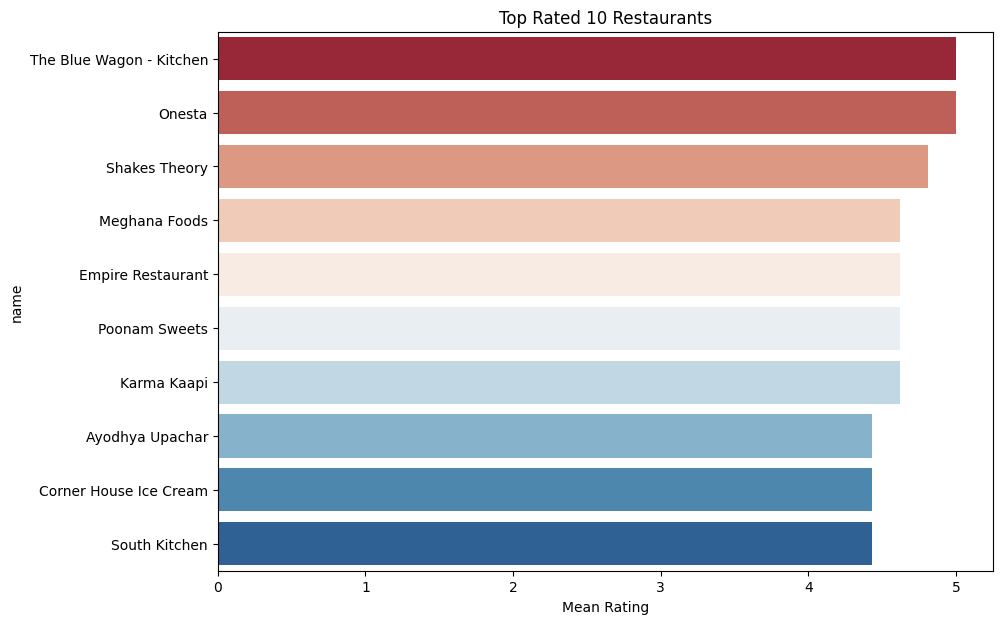

In [ ]:
df_rating = zomato_df.drop_duplicates(subset='name')

df_rating=df_rating.sort_values(by='Mean Rating', ascending=False).head(10)

plt.figure(figsize=(10,7))
sns.barplot(data=df_rating,x='Mean Rating',y='name',palette='RdBu')

plt.title('Top Rated 10 Restaurants');

In [ ]:
import pandas
df_percent=zomato_df.sample(frac=1)


In [ ]:
df_percent.set_index('rate', inplace=True)
indices = pd.Series(df_percent.index)
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])